# Création données géographiques

## csv vers graphe

On va charger le fichier des villes française puis créer un point avec les coordonnées. On va procéder comme dans le [tutoriel](https://geopandas.org/gallery/create_geopandas_from_pandas.html).

On utilise [geopandas.read_file](https://geopandas.org/docs/reference/api/geopandas.read_file.html#geopandas-read-file)

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv("./villes_france_30000.csv")

In [3]:
df

,idx,INSEE,nom,latitude,longitude,population
0,1,75100,Paris,48.867,2.333,2152423
1,2,13200,Marseille,43.300,5.400,800550
2,3,69380,Lyon,45.750,4.850,415487
3,4,31555,Toulouse,43.600,1.433,358688
4,5,6088,Nice,43.700,7.250,342439
...,...,...,...,...,...,...
29995,29996,52195,Farincourt,47.700,5.683,68
29996,29997,70090,Boursieres,47.617,6.050,68
29997,29998,54224,Germonville,48.400,6.217,68
29998,29999,73049,Bonvillaret,45.567,6.300,68


In [4]:
df.dtypes

idx             int64
INSEE           int64
nom            object
latitude      float64
longitude     float64
population      int64
dtype: object

In [5]:
df.columns

Index(['idx', 'INSEE', 'nom', 'latitude', 'longitude', 'population'], dtype='object')

On crée la geometry en disant que c'est un point, et on place le crs à ce qu'il faut.

In [6]:
villes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

Attention, le [code insee](https://fr.wikipedia.org/wiki/Code_officiel_g%C3%A9ographique) n'est pas le code postal.

In [7]:
villes[villes["nom"] == "Marseille"]

,idx,INSEE,nom,latitude,longitude,population,geometry
1,2,13200,Marseille,43.3,5.4,800550,POINT (5.4 43.3)


<Axes: >

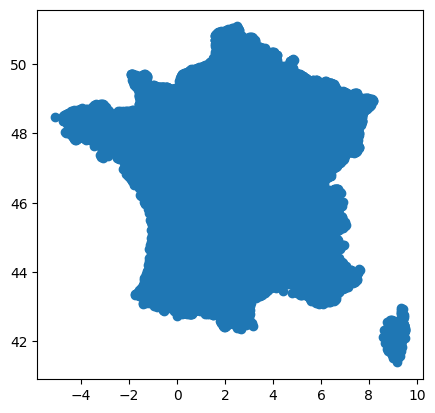

In [8]:
villes.plot()

garder les geandes villes :

<Axes: >

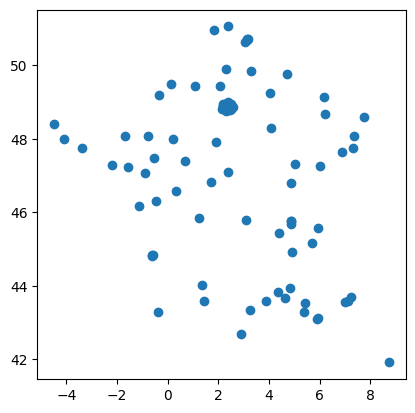

In [9]:
villes[villes.population >= 50000].plot()

Supprimer l'ile de France mais pas Paris avec [bbox tool](http://norbertrenner.de/osm/bbox.html) :

In [10]:
from shapely.geometry import Polygon

In [11]:
ile_de_france = Polygon([(1.965, 48.62), (1.965, 49.067), (2.899, 49.067), (2.899, 48.62)])

In [12]:
villes[villes.geometry.within(ile_de_france)]

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.333 48.867)
34,35,92012,Boulogne-Billancourt,48.833,2.250,101743,POINT (2.25 48.833)
37,38,93048,Montreuil,48.867,2.433,94754,POINT (2.433 48.867)
39,40,95018,Argenteuil,48.950,2.250,93096,POINT (2.25 48.95)
40,41,93066,Saint-Denis,48.933,2.358,89988,POINT (2.358 48.933)
...,...,...,...,...,...,...,...
28639,28640,95633,Vaudherland,49.000,2.483,93,POINT (2.483 49)
28640,28641,77193,Forfry,49.050,2.850,93,POINT (2.85 49.05)
29306,29307,95212,Epiais-les-Louvres,49.033,2.550,80,POINT (2.55 49.033)
29359,29360,78917,Rhodon,48.717,2.067,79,POINT (2.067 48.717)


In [13]:
villes[(~villes.geometry.within(ile_de_france)) | (villes["nom"] == "Paris")]

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.333 48.867)
1,2,13200,Marseille,43.300,5.400,800550,POINT (5.4 43.3)
2,3,69380,Lyon,45.750,4.850,415487,POINT (4.85 45.75)
3,4,31555,Toulouse,43.600,1.433,358688,POINT (1.433 43.6)
4,5,6088,Nice,43.700,7.250,342439,POINT (7.25 43.7)
...,...,...,...,...,...,...,...
29995,29996,52195,Farincourt,47.700,5.683,68,POINT (5.683 47.7)
29996,29997,70090,Boursieres,47.617,6.050,68,POINT (6.05 47.617)
29997,29998,54224,Germonville,48.400,6.217,68,POINT (6.217 48.4)
29998,29999,73049,Bonvillaret,45.567,6.300,68,POINT (6.3 45.567)


<Axes: >

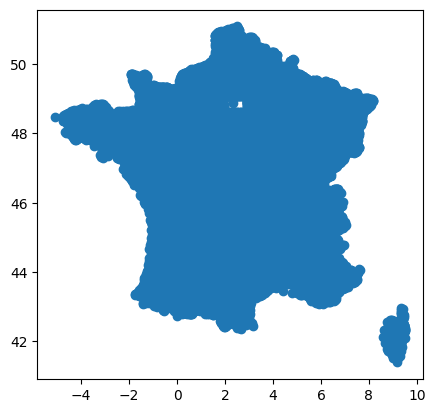

In [14]:
villes[(~villes.geometry.within(ile_de_france)) | (villes["nom"] == "Paris")].plot()

## distance puis graphe

In [15]:
villes.buffer(10)

/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_93051/1319542595.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  villes.buffer(10)


0        POLYGON ((12.333 48.867, 12.28485 47.88683, 12...
1        POLYGON ((15.4 43.3, 15.35185 42.31983, 15.207...
2        POLYGON ((14.85 45.75, 14.80185 44.76983, 14.6...
3        POLYGON ((11.433 43.6, 11.38485 42.61983, 11.2...
4        POLYGON ((17.25 43.7, 17.20185 42.71983, 17.05...
                               ...                        
29995    POLYGON ((15.683 47.7, 15.63485 46.71983, 15.4...
29996    POLYGON ((16.05 47.617, 16.00185 46.63683, 15....
29997    POLYGON ((16.217 48.4, 16.16885 47.41983, 16.0...
29998    POLYGON ((16.3 45.567, 16.25185 44.58683, 16.1...
29999    POLYGON ((16.317 47.8, 16.26885 46.81983, 16.1...
Length: 30000, dtype: geometry

In [16]:
MAX_DIST = 1
graphe = villes[villes.population >= 10000]

g = {nom: {} for nom in graphe.nom}

prev = None
for i in range(len(graphe)):
    dist = graphe.iloc[i+1:].distance(graphe.iloc[i].geometry)
    for j, d in enumerate(dist):
        if d < MAX_DIST:
            g[graphe.iloc[i].nom][graphe.iloc[i + j + 1].nom] = {"weight": d}
            g[graphe.iloc[i + j + 1].nom][graphe.iloc[i].nom] = {"weight": d}

    if (int(i / len(graphe) * 100) % 10 == 0) and (int(i / len(graphe) * 100) != prev):
        prev = int(i / len(graphe) * 100)
        print(str(prev)+"% effectué")
        


/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_93051/2340101180.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist = graphe.iloc[i+1:].distance(graphe.iloc[i].geometry)


0% effectué
10% effectué
20% effectué
30% effectué
40% effectué
50% effectué
60% effectué
70% effectué
80% effectué
90% effectué


In [17]:
len(g)

787

In [18]:
sum(len(g[x]) for x in g)

76448

Conversion du graphe dictionnaire en graphe de [networkx](https://networkx.org/documentation/stable/index.html)

In [19]:
import networkx as nx
G = nx.from_dict_of_dicts(g)

In [20]:
len(G)

787

In [21]:
print(G["Paris"])

{'Boulogne-Billancourt': {'weight': 0.08969392398596439}, 'Montreuil': {'weight': 0.09999999999999964}, 'Argenteuil': {'weight': 0.11737972567697091}, 'Saint-Denis': {'weight': 0.07057619995437786}, 'Versailles': {'weight': 0.21092415698539627}, 'Nanterre': {'weight': 0.13703284277865685}, 'Vitry-sur-Seine': {'weight': 0.10744766167767127}, 'Aulnay-sous-Bois': {'weight': 0.2018539075668361}, 'Creteil': {'weight': 0.15815182578775153}, 'Champigny-sur-Marne': {'weight': 0.19067249408344042}, 'Colombes': {'weight': 0.09689685237406041}, 'Saint-Maur-des-Fosses': {'weight': 0.1799388785115656}, 'Aubervilliers': {'weight': 0.07071067811865764}, 'Rueil-Malmaison': {'weight': 0.13395894893585936}, 'Neuilly-sur-Seine': {'weight': 0.06791170738540012}, 'Drancy': {'weight': 0.13433167906342988}, 'Antony': {'weight': 0.12156479753612638}, 'Sarcelles': {'weight': 0.1420880009008526}, 'Beauvais': {'weight': 0.6187535858481976}, 'Noisy-le-Grand': {'weight': 0.2346167086973983}, 'Ivry-sur-Seine': {'we

In [22]:
G.number_of_edges()

38224

On peut utiliser les [algorithmes de networkx](https://networkx.org/documentation/stable//reference/algorithms/index.html) pour vérifier que notre graphe est connexe :

In [23]:
nx.is_connected(G)

False

In [24]:
list(nx.connected_components(G))

[{'Abbeville',
  'Acheres',
  'Agde',
  'Agen',
  'Aix-en-Provence',
  'Aix-les-Bains',
  'Albert',
  'Albertville',
  'Albi',
  'Alencon',
  'Ales',
  'Alfortville',
  'Allauch',
  'Allonnes',
  'Amberieu-en-Bugey',
  'Amboise',
  'Amiens',
  'Andresy',
  'Angers',
  'Anglet',
  'Angouleme',
  'Annecy',
  'Annecy-le-Vieux',
  'Annemasse',
  'Annonay',
  'Antibes',
  'Antony',
  'Anzin',
  'Apt',
  'Arcachon',
  'Arcueil',
  'Argentan',
  'Argenteuil',
  'Arles',
  'Armentieres',
  'Arnouville-les-Gonesse',
  'Arras',
  'Athis-Mons',
  'Aubagne',
  'Aubenas',
  'Aubergenville',
  'Aubervilliers',
  'Auch',
  'Auchel',
  'Audincourt',
  'Aulnay-sous-Bois',
  'Auray',
  'Aurillac',
  'Autun',
  'Auxerre',
  'Avignon',
  'Avion',
  'Avon',
  'Avrille',
  'Bagneux',
  'Bagnolet',
  'Bagnols-sur-Ceze',
  'Bailleul',
  'Bar-le-Duc',
  'Barentin',
  'Bayeux',
  'Bayonne',
  'Beaucaire',
  'Beaune',
  'Beausoleil',
  'Beauvais',
  'Begles',
  'Behren-les-Forbach',
  'Belfort',
  'Bellegarde-su

## dessin du graphe

In [25]:
import matplotlib.pyplot as plt

On a les sommets :

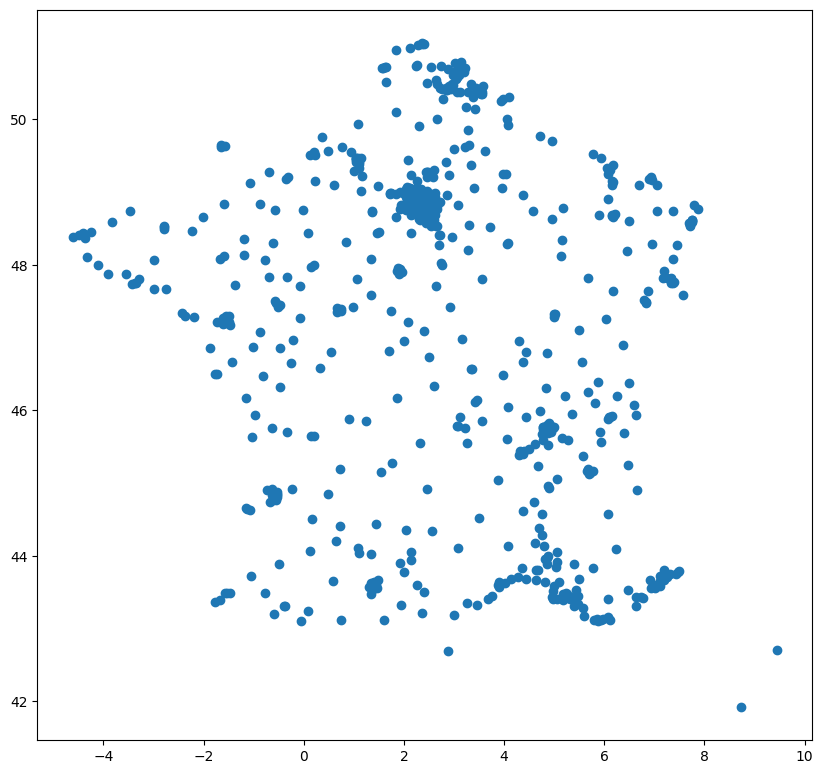

In [26]:
fig, ax = plt.subplots(figsize=(10, 10)) 

graphe.plot(ax=ax)

plt.show()

On crée le geodataframe des arêtes :

In [27]:
from shapely.geometry import LineString

In [28]:
rows = []
for (u, v) in G.edges:
    p1 = graphe[graphe["nom"] == u].geometry.iloc[0]
    p2 = graphe[graphe["nom"] == v].geometry.iloc[0]
    
    row = {'orig': u, 
           'dest': v,
           'geometry': LineString([p1, p2])}
    rows.append(row)

In [29]:
gdf = gpd.GeoDataFrame(rows, crs="EPSG:4326")

In [30]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

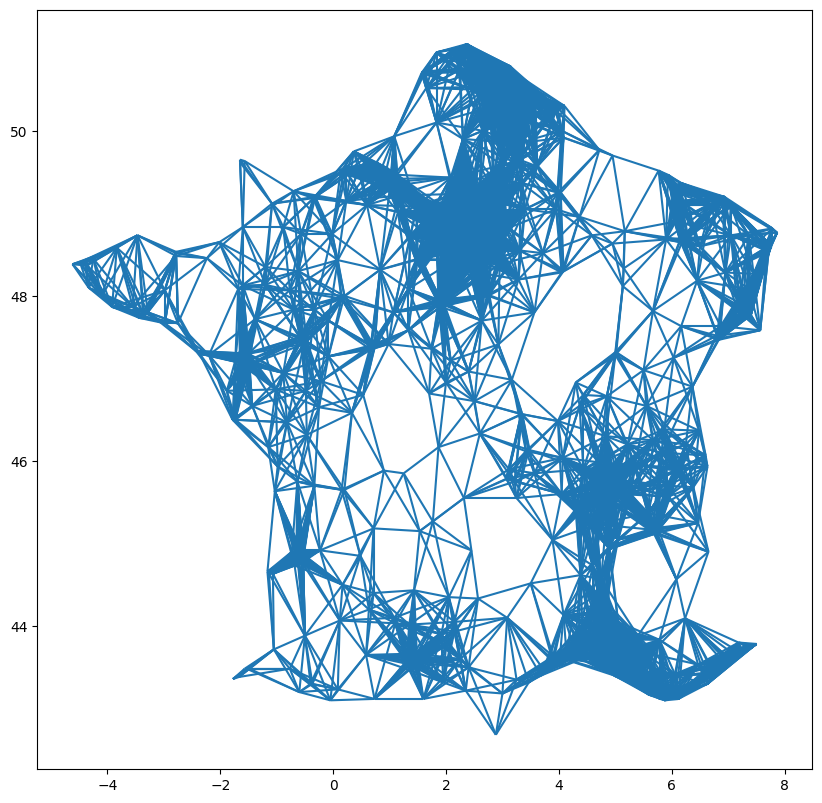

In [31]:
fig, ax = plt.subplots(figsize=(10, 10)) 

gdf.plot(ax=ax)

plt.show()